# Easi, EG38, raw proteins

- Diagnosis: MDS
- Sampling: at diagnosis
- BM blasts: 12%

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

In [70]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


In [71]:
adata.obs['batch_group'] 

GTAGTACCAATCCTTT-1-s4d1    Neurips
CTCAAGAGTCACAGAG-1-s4d1    Neurips
CTGTGGGTCATGCGGC-1-s4d1    Neurips
CGTGATAGTTATCTGG-1-s4d1    Neurips
AGATCCAAGATCGGTG-1-s4d1    Neurips
                            ...   
TTTGTCAGTCATGCAT-1-17        Caron
TTTGTCAGTGCTTCTC-1-17        Caron
TTTGTCAGTGGACGAT-1-17        Caron
TTTGTCATCAACGAAA-1-17        Caron
TTTGTCATCTAACTGG-1-17        Caron
Name: batch_group, Length: 298991, dtype: category
Categories (5, object): ['Caron', 'Easi', 'Granja', 'Neurips', 'Seurat']

In [72]:
adata_easi=adata[adata.obs['batch_group'] == 'Easi' ]

adata_easi

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [73]:
adata_easi.obs['POOL'].unique().tolist()

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [74]:
adata_easi.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [58]:
#select sample from Easigenomics dataset

adata_sample=adata_easi[adata_easi.obs['POOL'] == 'EG38']

In [59]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 681 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [60]:
adata_sample.obs['new_cell_type'].unique().tolist()

['preleukemic', 'non-leukemic?', 'NK', 'non-leukemic']

In [61]:
adata_sample.obs['POOL'].unique().tolist()

['EG38']

In [62]:
#Select only NK-cells (based on new_cell_type annotations)

adata_nk=adata_sample[adata_sample.obs['new_cell_type'] == 'NK' ]

In [63]:
adata_nk.copy()

AnnData object with n_obs × n_vars = 34 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [64]:
#Two types of NK cells annotated by Seurat

adata_nk.obs['cell_type']

AACCGCGGTTGTGGCC-1-101    NKT
ACATACGCAGACGCTC-1-101    NKT
ACCCACTTCTCGTATT-1-101    NKT
AGATTGCAGCAGATCG-1-101    NKT
CAAGGCCCATTCGACA-1-101    NKT
CAGCTAAAGCGAGAAA-1-101    NKT
CAGGTGCGTCTCTCGT-1-101    NKT
CATCAGAAGCCGATTT-1-101    NKT
CCGGTAGAGATGAGAG-1-101    NKT
CGGACTGGTCCTCCAT-1-101    NKT
CGTCTACCACTACAGT-1-101    NKT
CTCGAGGTCGTCCGTT-1-101    NKT
CTGCCTAAGCCTATGT-1-101    NKT
GAACGGAAGTCAAGGC-1-101    NKT
GATCTAGGTTCGAATC-1-101    NKT
GCAGTTACAAGAAGAG-1-101    NKT
GCGACCACAAACTGTC-1-101    NKT
GCGCAGTCAAAGCAAT-1-101    NKT
GCGCGATAGTAGCCGA-1-101    NKT
GCTGCGATCACTTACT-1-101    NKT
GGAAAGCAGACAGAGA-1-101    NKT
GGAAAGCGTTCGGCAC-1-101    NKT
GGGCATCAGGGAACGG-1-101    NKT
GGTGAAGTCGGACAAG-1-101    NKT
GTCTCGTTCACGACTA-1-101    NKT
GTTTCTATCGGAAACG-1-101    NKT
TACGGTATCACTGGGC-1-101    NKT
TCGTACCTCGCCTGTT-1-101    NKT
TGACGGCTCTTCCTTC-1-101    NKT
TGAGAGGGTCCGAACC-1-101    NKT
TGCTGCTAGAGGACGG-1-101    NKT
TGGCGCAGTATGAATG-1-101    NKT
TGGCGCAGTTGGGACA-1-101    NKT
TTGGAACCAG

In [65]:
#surface protein expression of NK- and T-cells
nk_prot=adata_nk.obsm['protein_expression']

In [66]:
#surface protein expression of whole sample
prot=adata_sample.obsm['protein_expression']

In [67]:
#NK- and T-cells in sample
nk_prot.shape

(34, 141)

In [68]:
#All cells in sample

prot.shape

(681, 141)

In [75]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0).any(axis=0)]

for col in prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [76]:
#To exclude columns that contain only zeros from NKT-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0
(nk_prot != 0).any(axis=0)
nk_prot.loc[:, (nk_prot != 0).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0).any(axis=0)]

for col in nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


In [77]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [78]:
#sorting by mean, NKT cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 681 cells in the sample


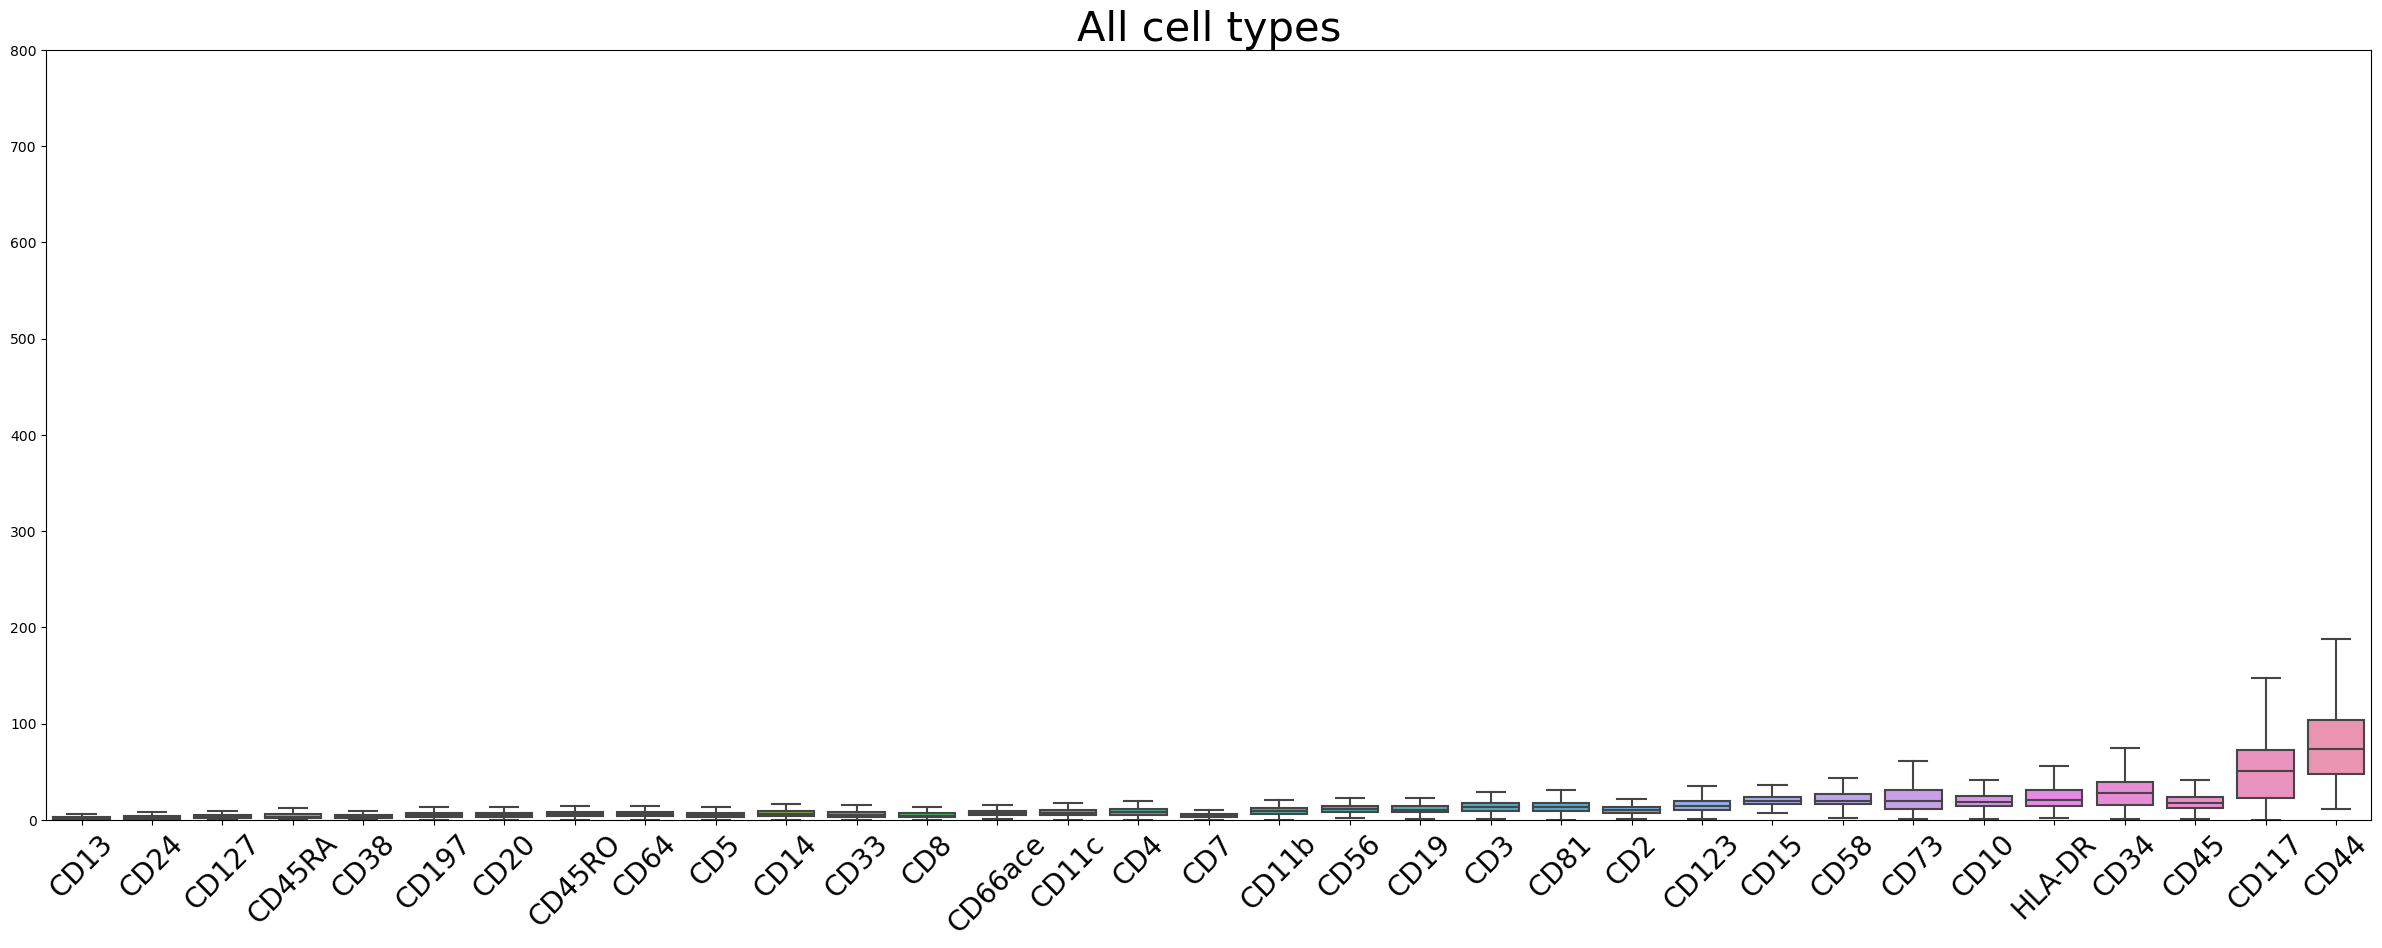

In [86]:
#All cell types

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 800)
a=sns.boxplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)




In total: 34 NK- and T-cells in the sample


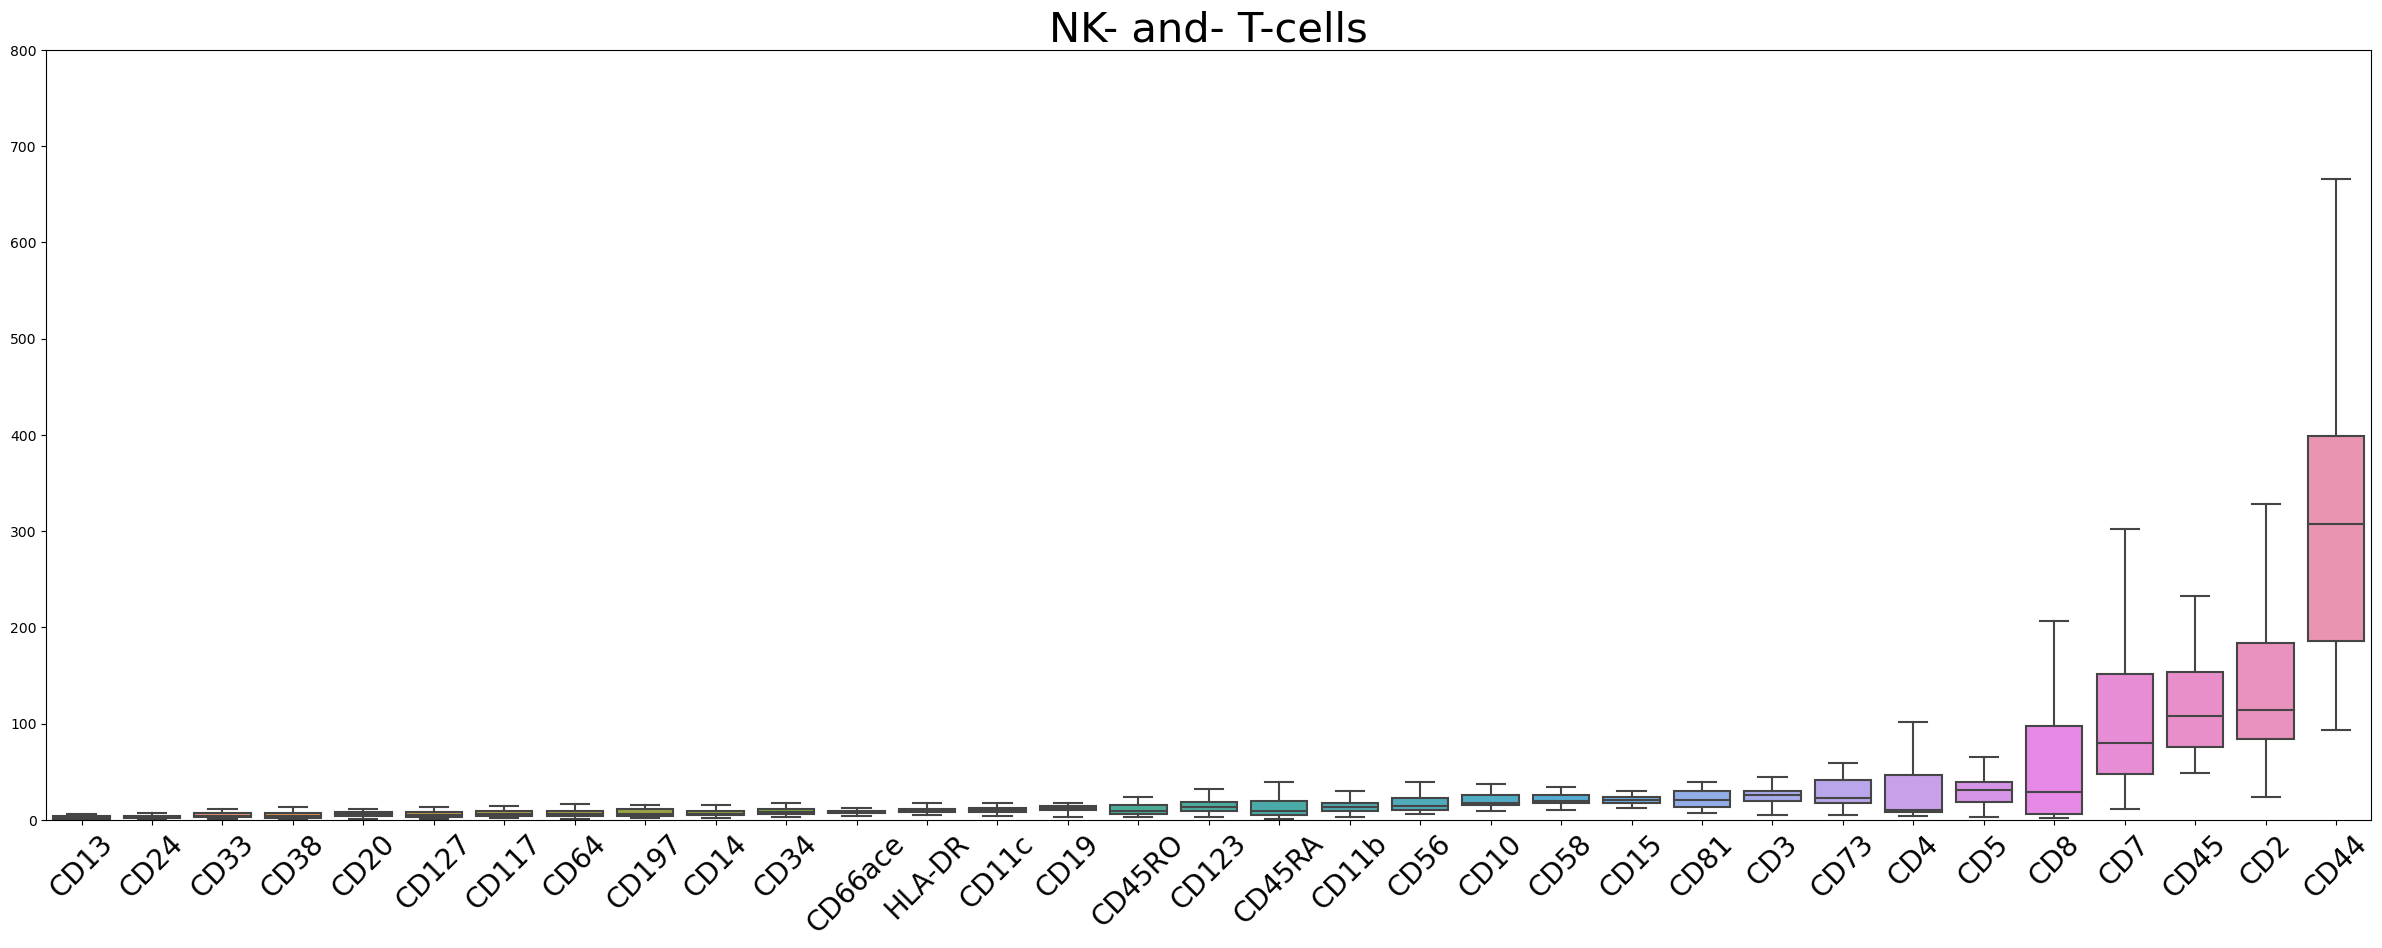

In [84]:
#NK- and T-cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 800)
a=sns.boxplot(data=df_sorted_nk,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and- T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)


In total: 681 cells in the sample


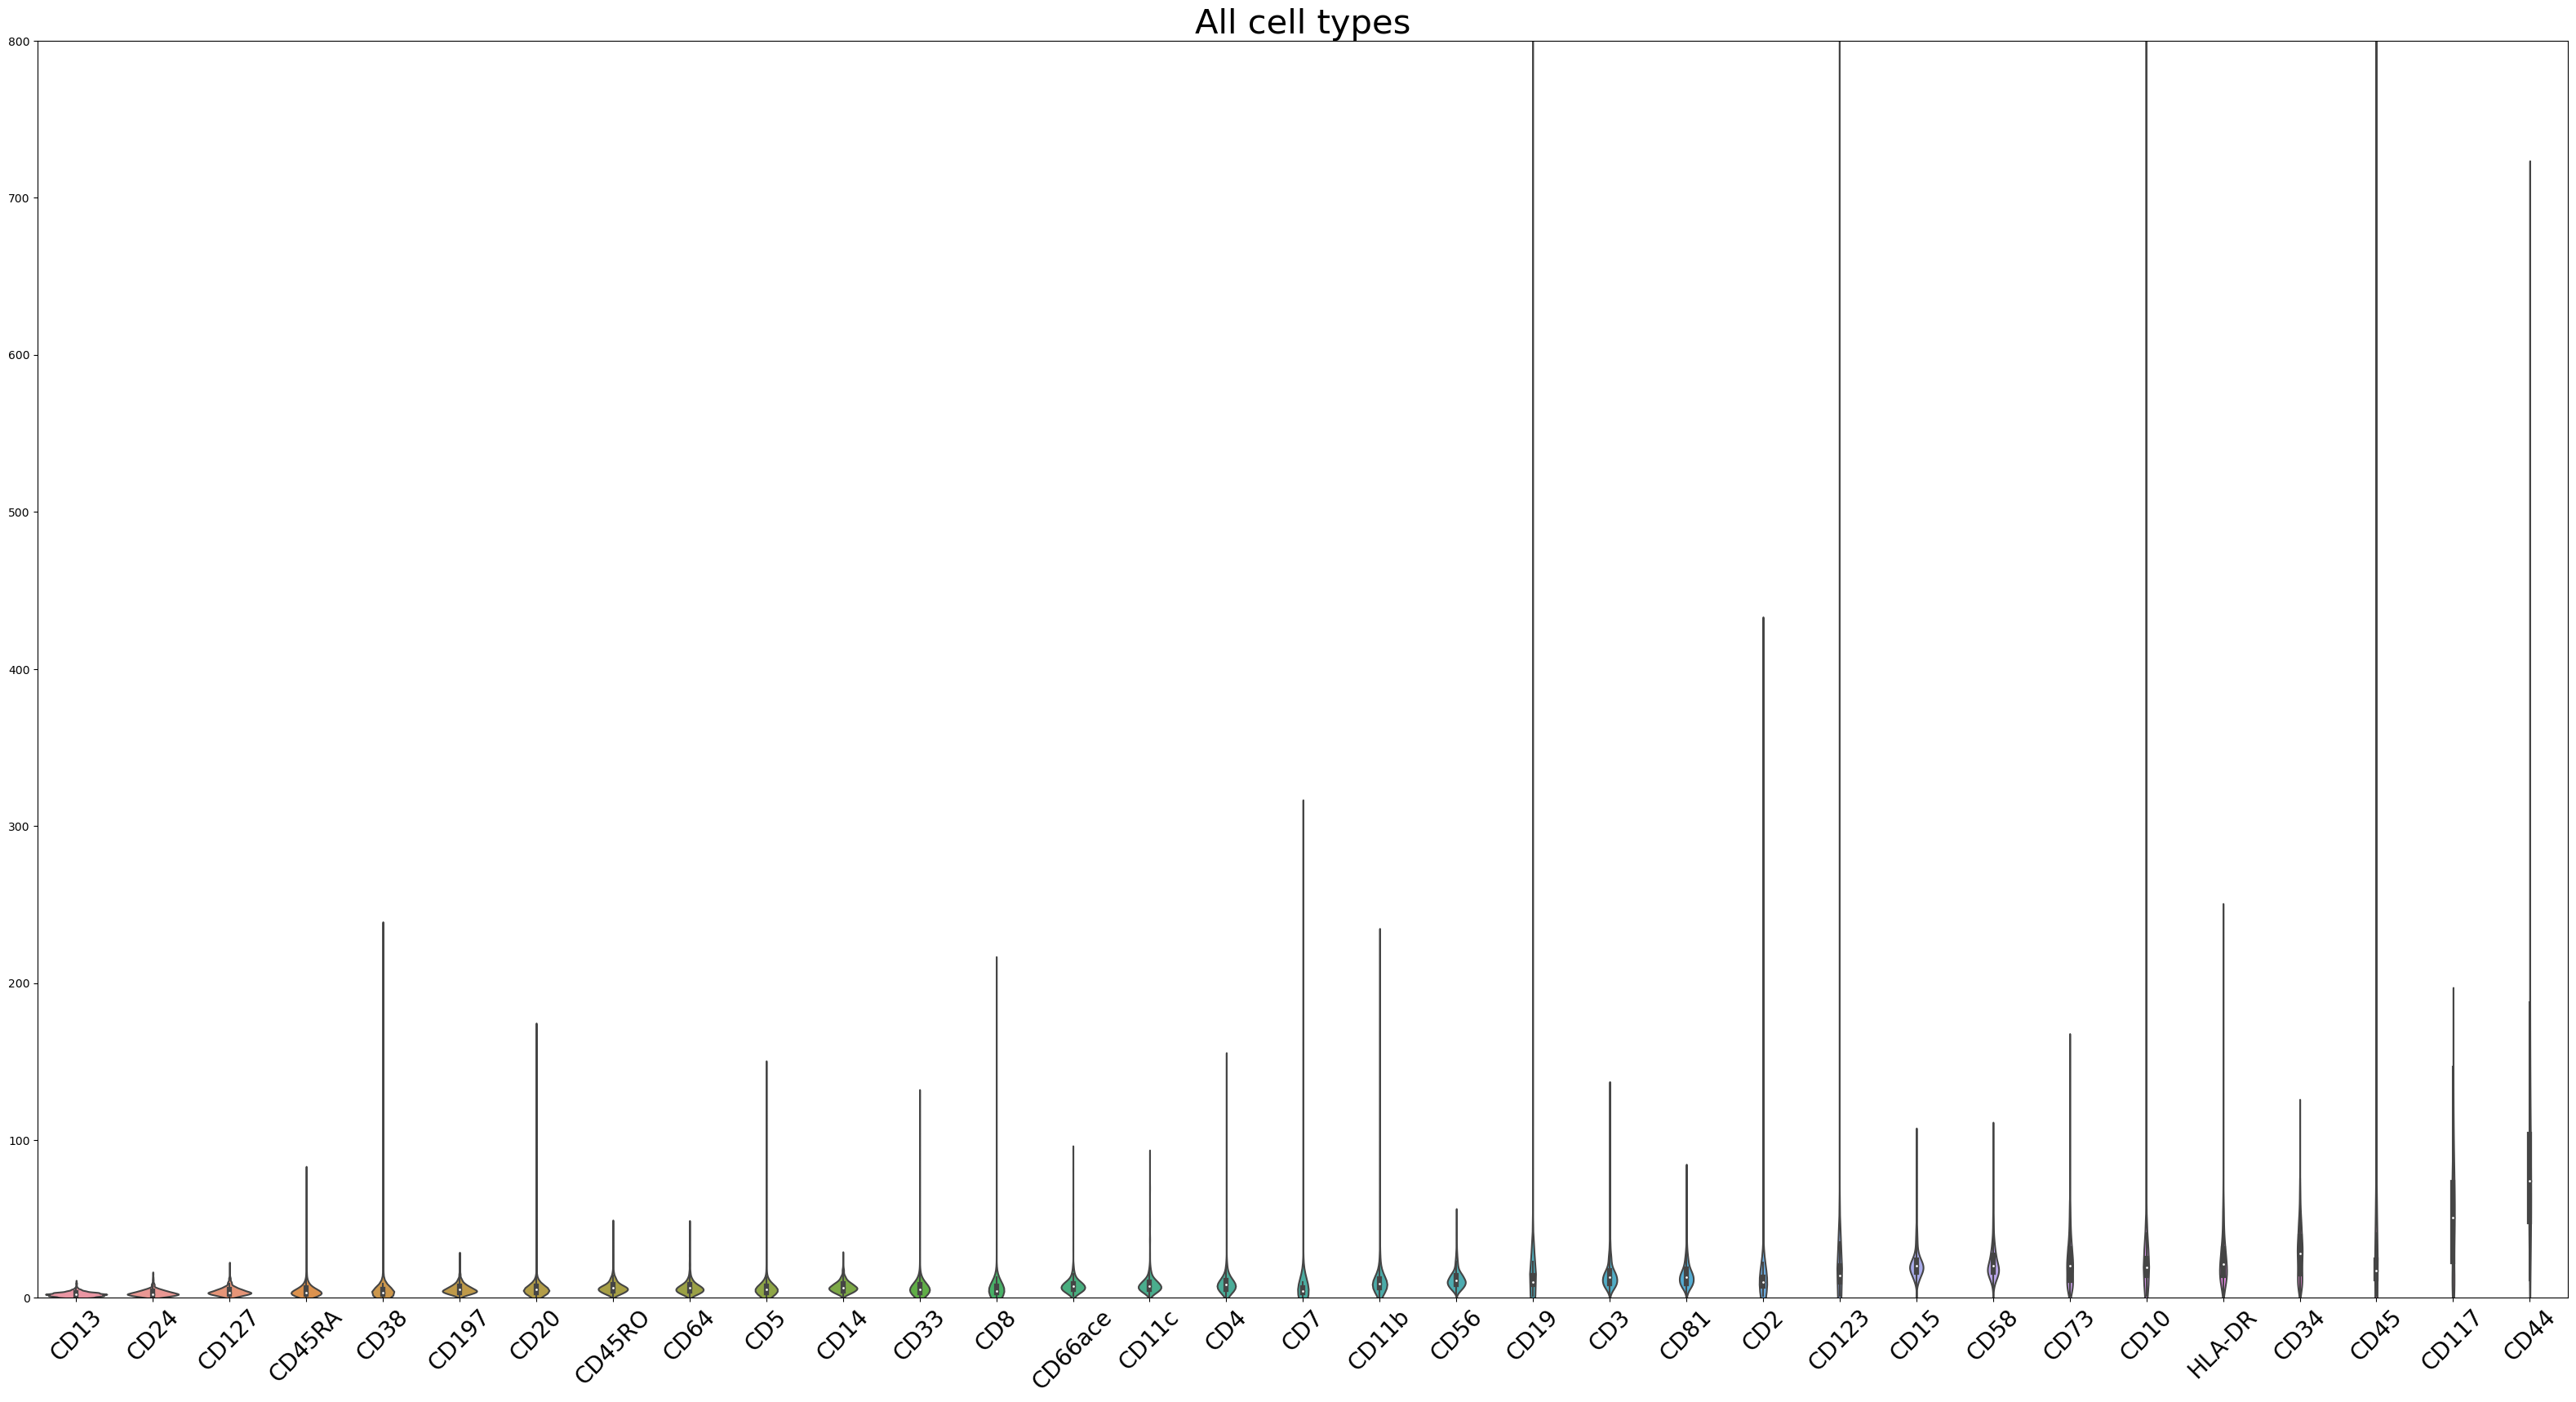

In [89]:
#All cells

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 800)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

In total: 34 NK- and T-cells in the sample


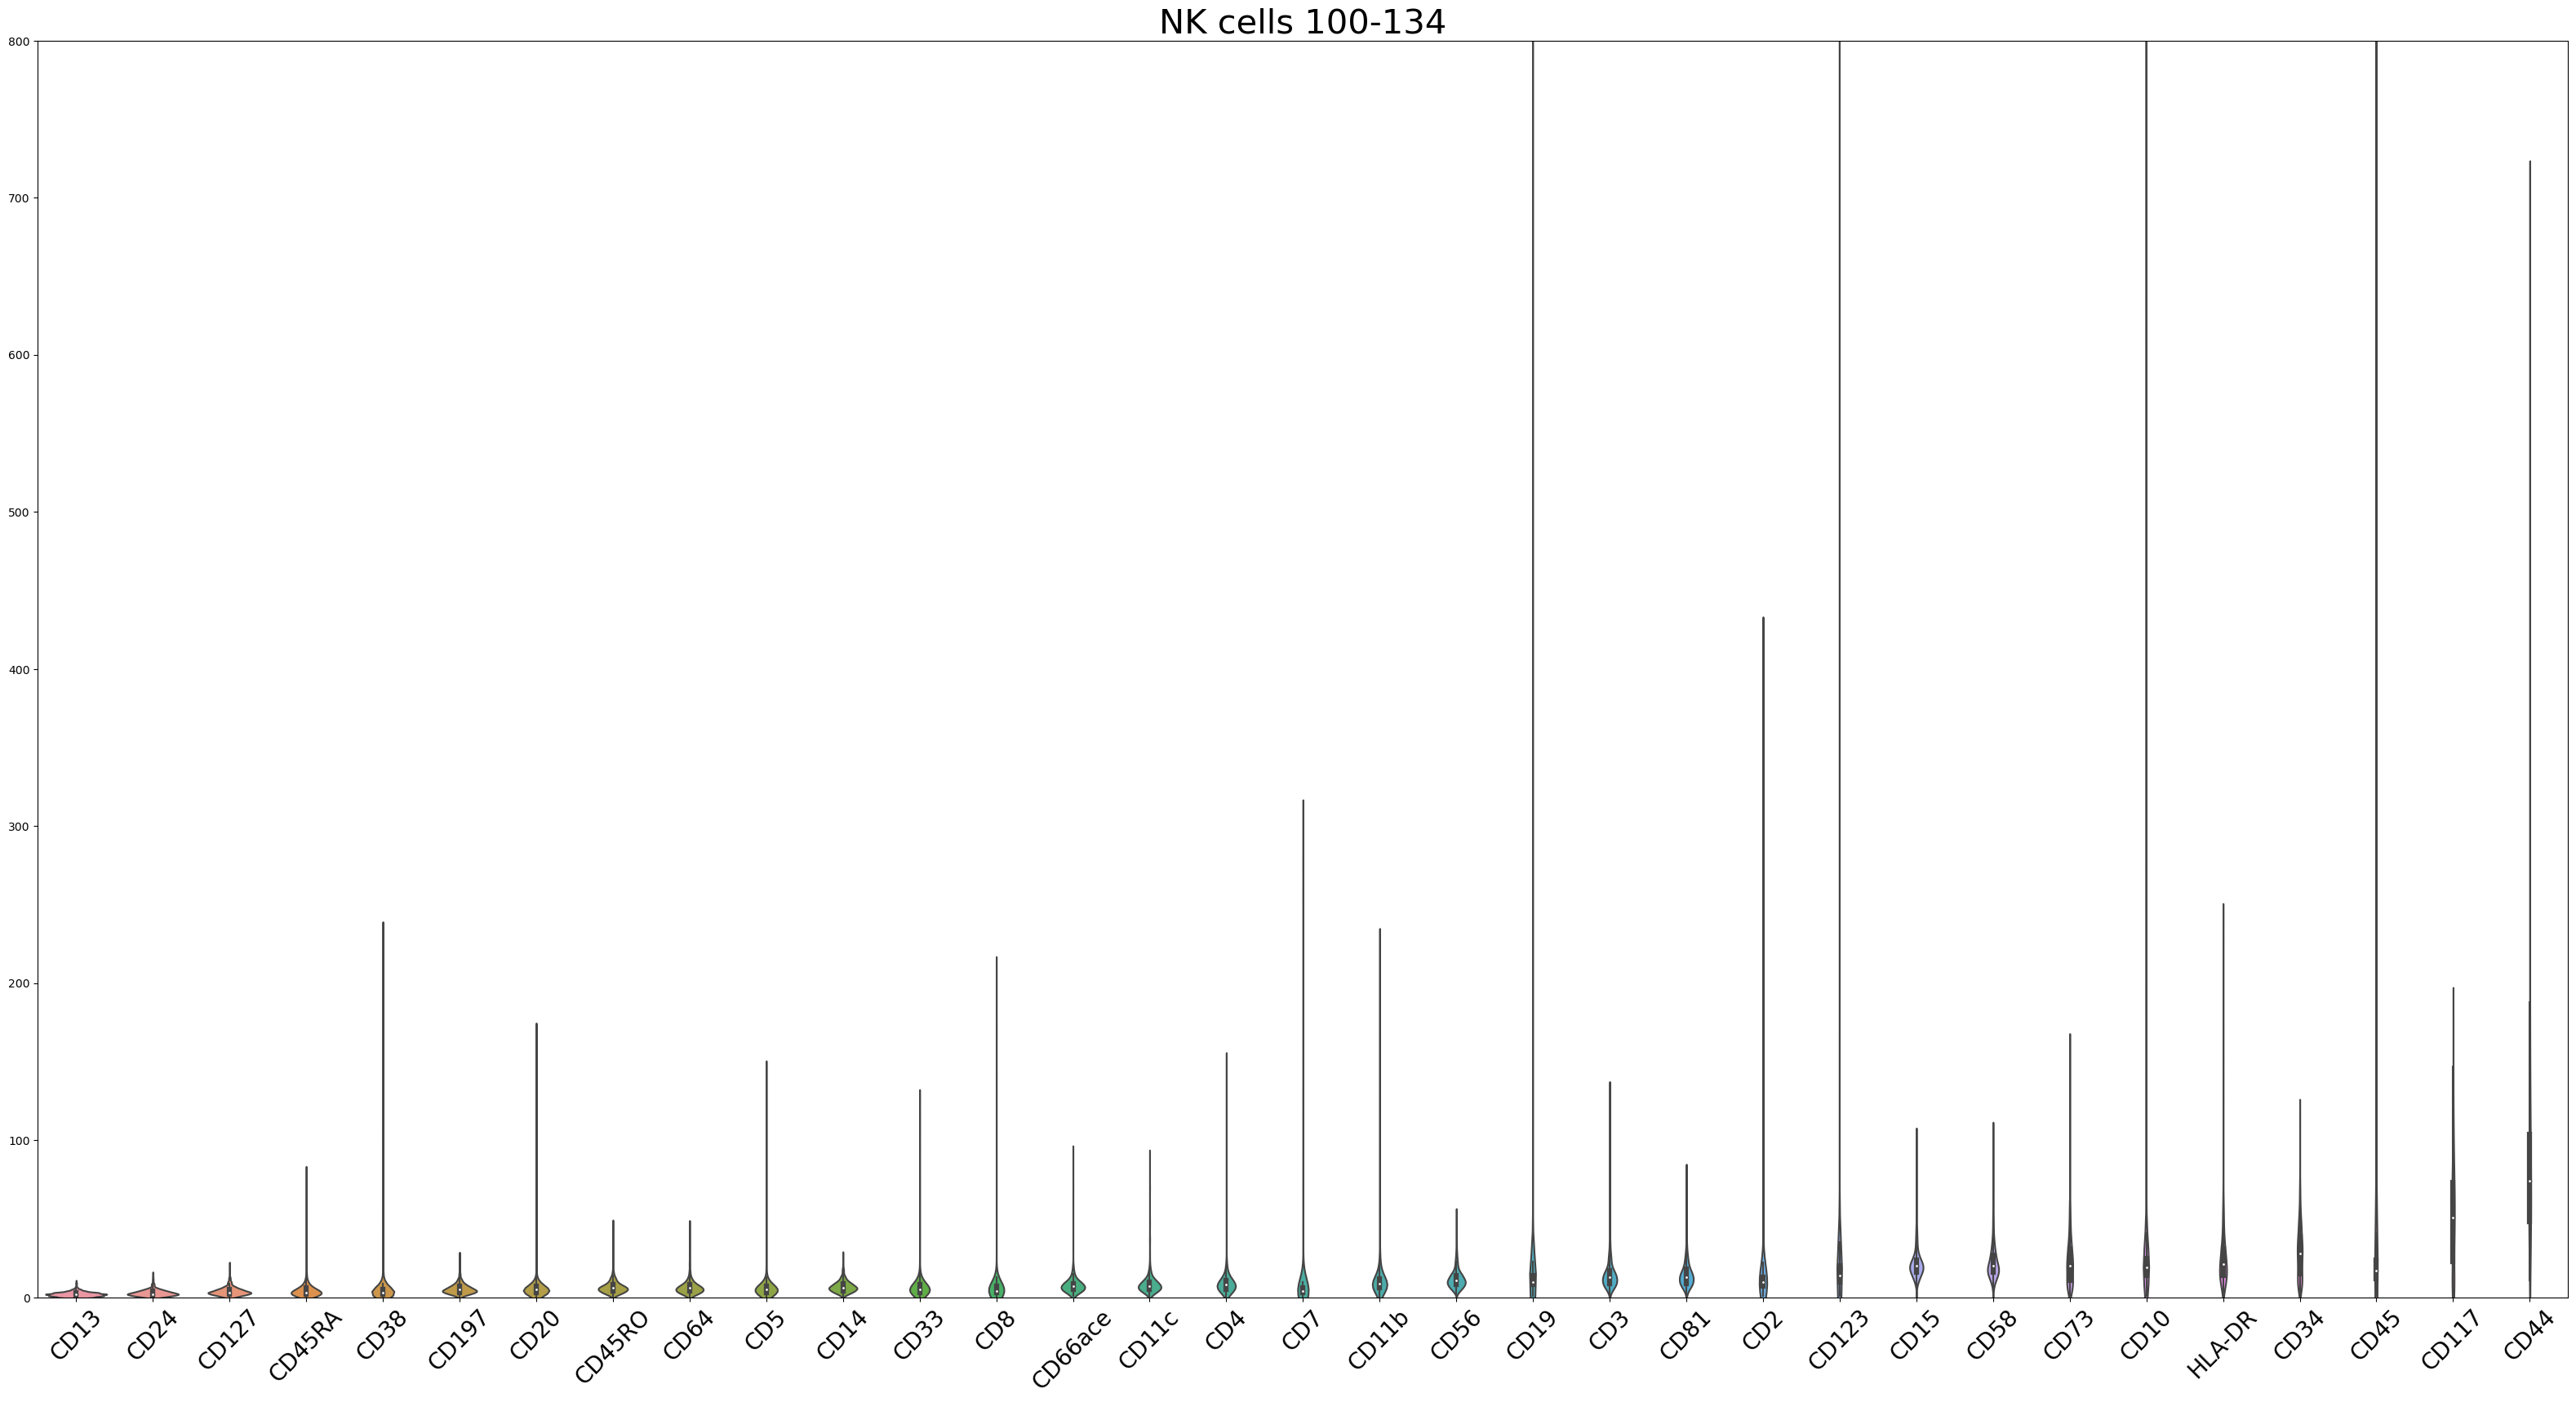

In [85]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 800)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)



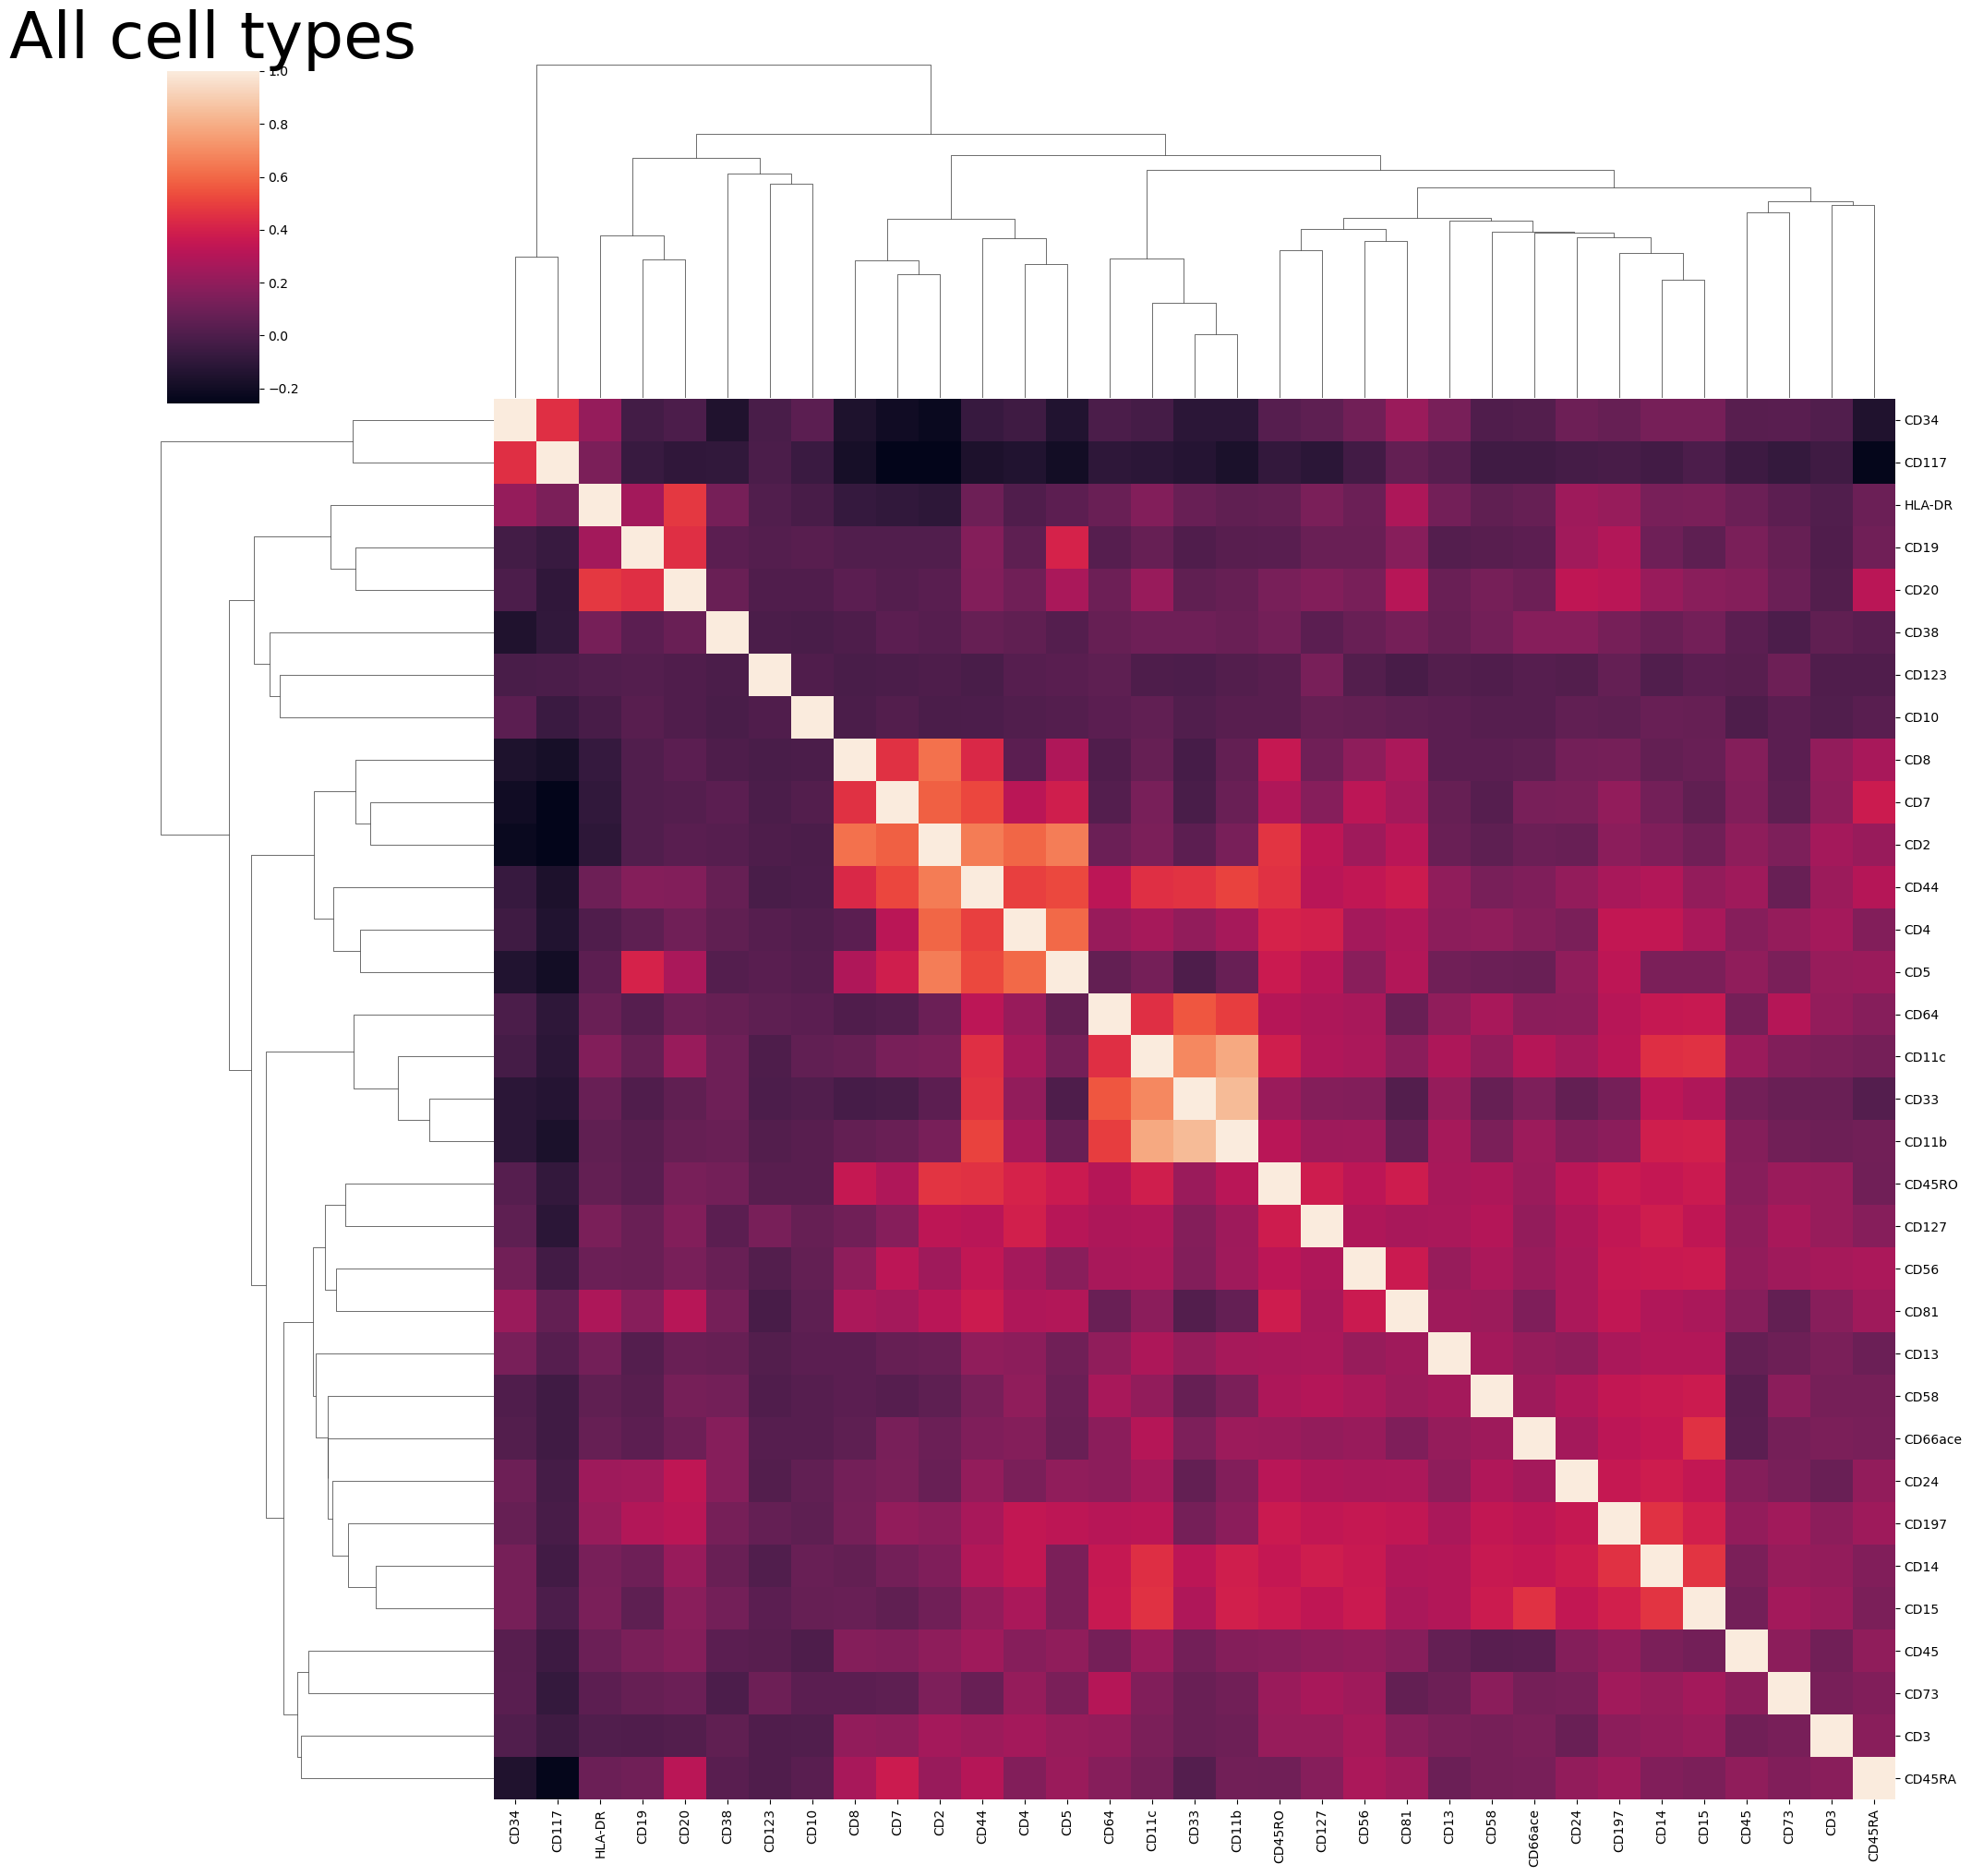

In [25]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



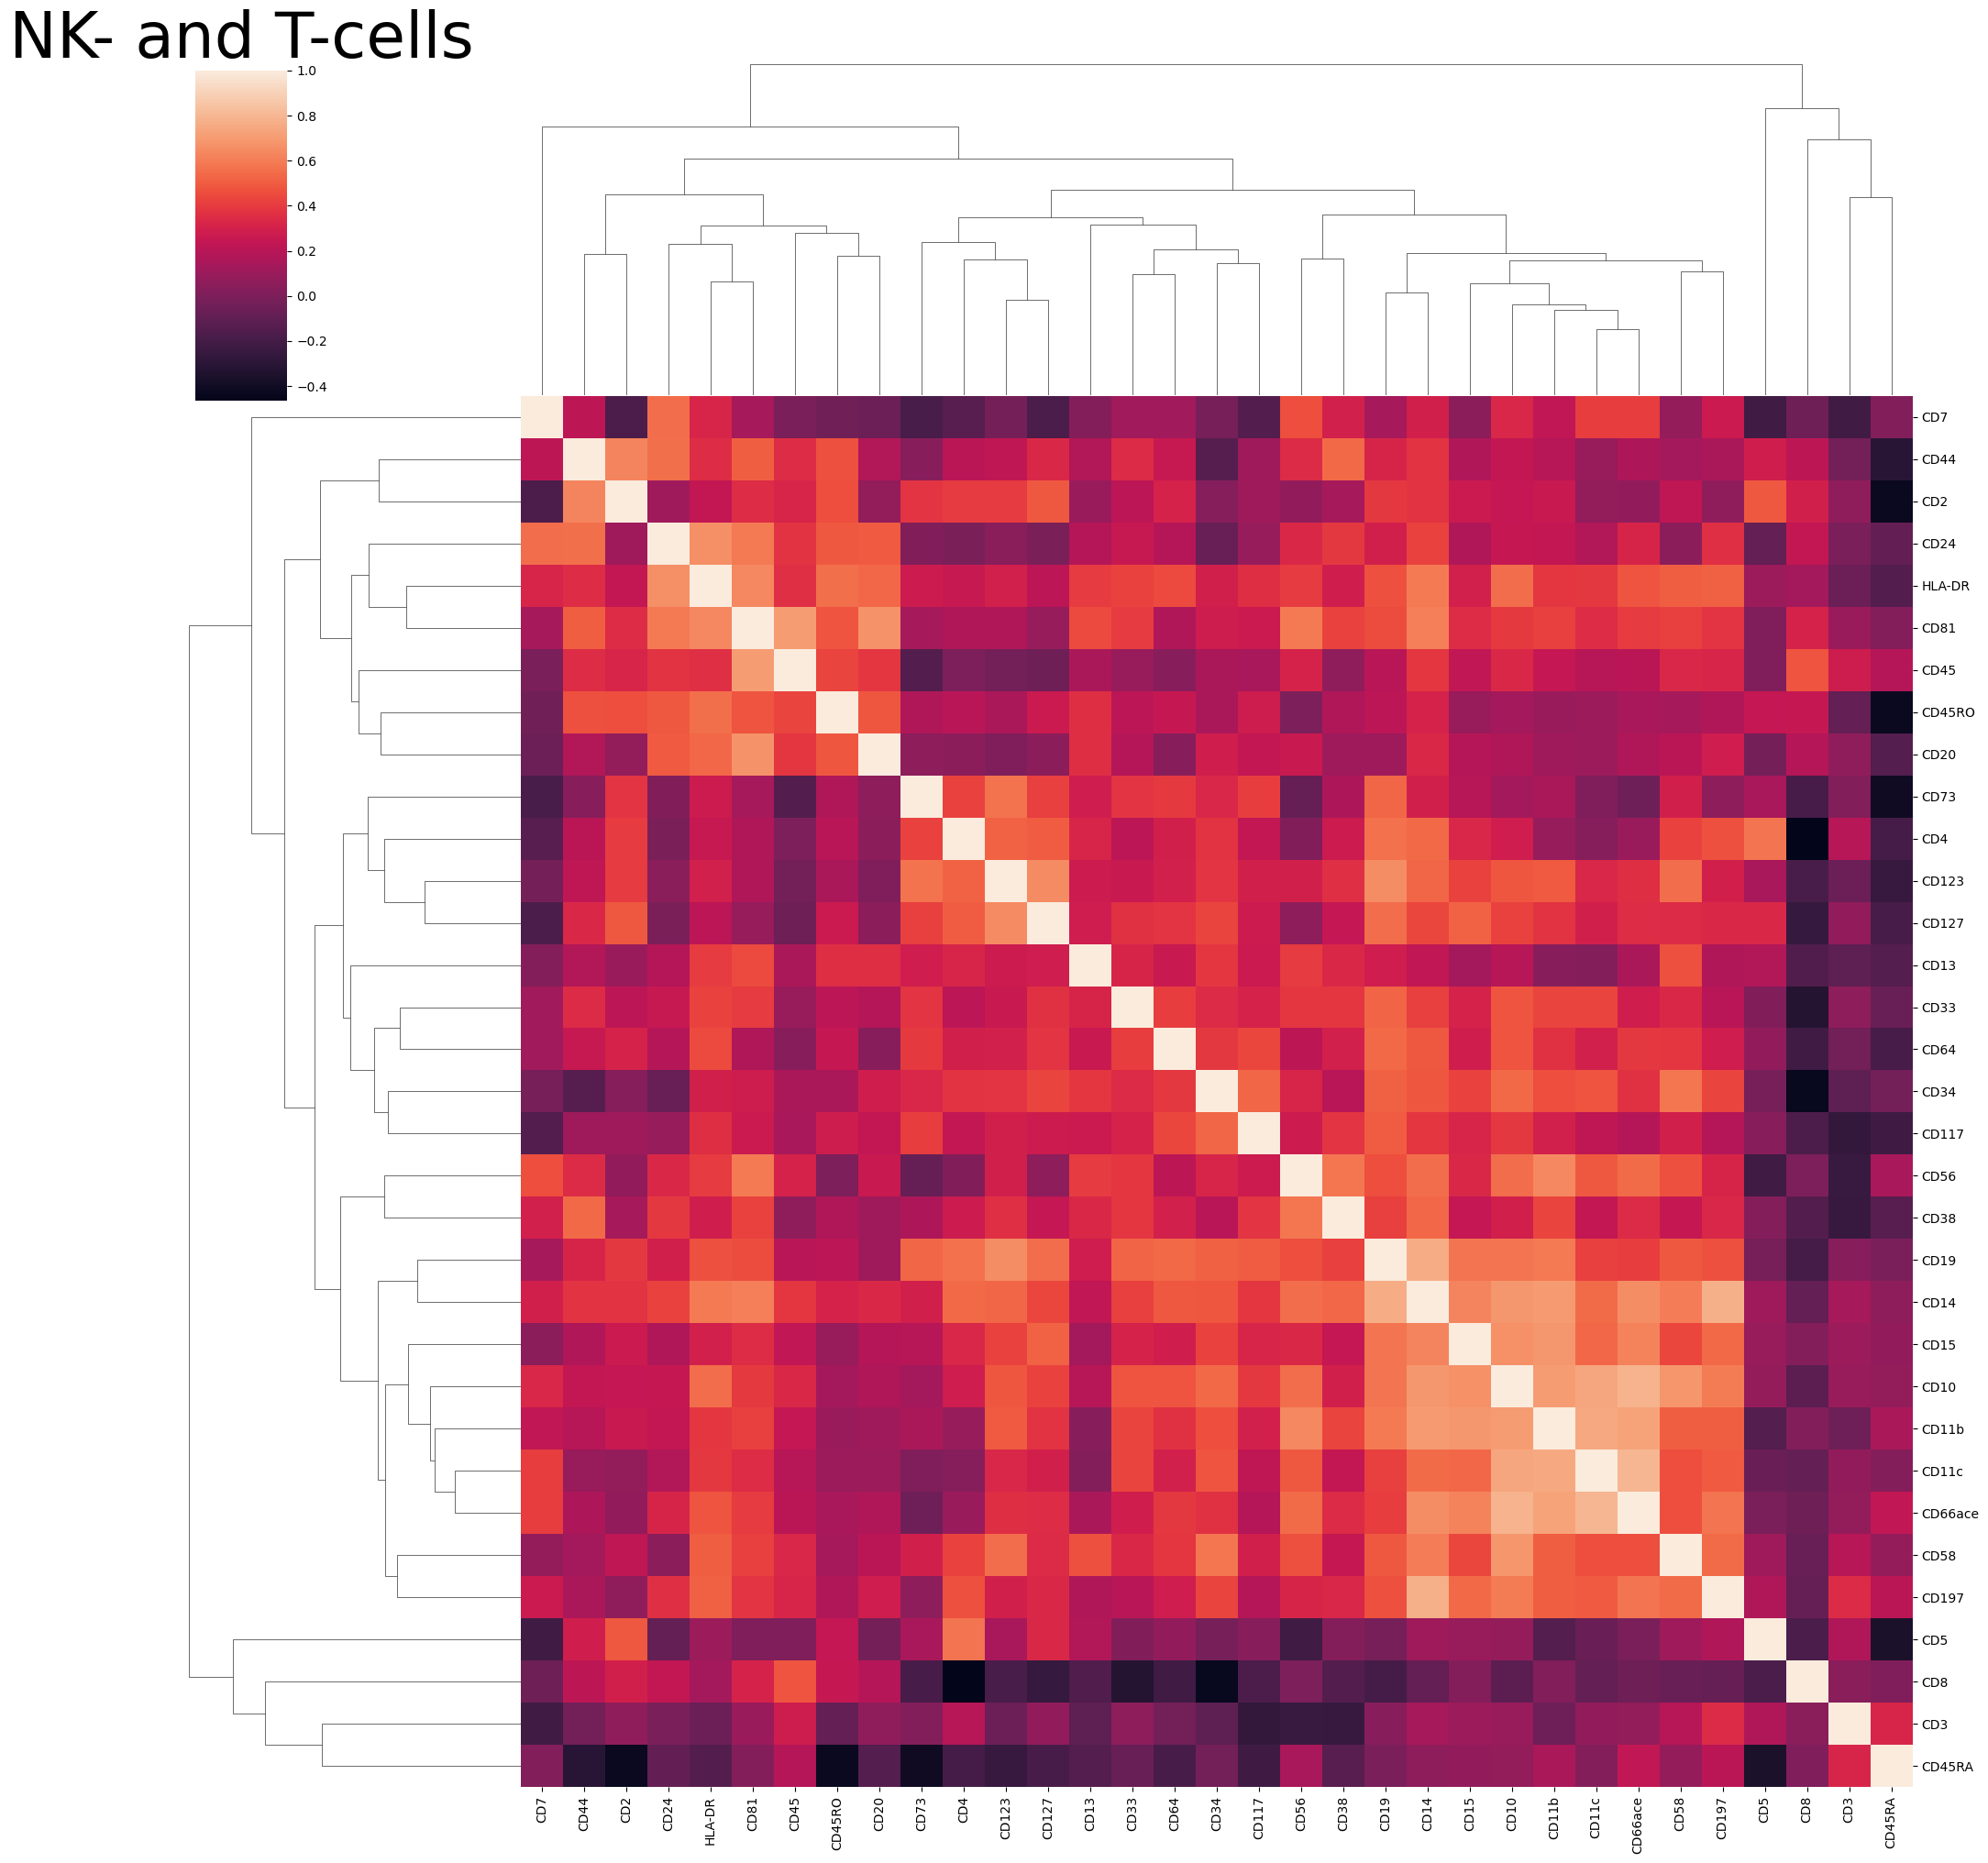

In [91]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK- and T-cells', fontsize = 50) ;


In [27]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 681 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7', 'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b', 'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45', 'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [28]:
adata_sample.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD38,CD127,CD45,CD73,CD197,CD34,CD10,CD15,CD117,CD66ace
AAACGGGGTCTAGCCG-1-101,preleukemic,1605,0.106839,0.251541,3407.0,NaN,NaN,NaN,NaN,False,...,4,3,24,13,5,43,27,23,90,15
AAAGATGAGGGCTTCC-1-101,preleukemic,1442,0.068451,0.376331,3287.0,NaN,NaN,NaN,NaN,False,...,2,3,10,28,3,29,17,32,122,9
AAAGATGCATGGGAAC-1-101,non-leukemic?,4370,0.056573,0.353839,18401.0,NaN,NaN,NaN,NaN,False,...,27,4,27,23,3,2,5,8,72,3
AAAGCAACAGATAATG-1-101,preleukemic,4108,0.023593,0.482913,20981.0,NaN,NaN,NaN,NaN,False,...,4,6,24,29,3,46,27,36,66,3
AAATGCCTCAAAGACA-1-101,preleukemic,4368,0.029612,0.438065,20465.0,NaN,NaN,NaN,NaN,False,...,1,2,17,28,4,30,17,19,50,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCCCTCAGT-1-101,preleukemic,4197,0.022735,0.460623,17726.0,NaN,NaN,NaN,NaN,False,...,6,4,28,11,3,53,23,18,85,7
TTTCCTCTCGGCTACG-1-101,preleukemic,3276,0.013090,0.446258,12681.0,NaN,NaN,NaN,NaN,False,...,1,7,31,33,3,33,19,14,51,4
TTTGCGCGTTAAGGGC-1-101,non-leukemic?,4535,0.027661,0.402707,21872.0,NaN,NaN,NaN,NaN,False,...,5,11,47,61,4,41,34,34,6,15
TTTGCGCTCTGTCCGT-1-101,preleukemic,3558,0.025139,0.516925,17105.0,NaN,NaN,NaN,NaN,False,...,8,2,20,24,7,24,19,33,68,16


In [29]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 34 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'CD45RA', 'CD123', 'CD7', 'CD4', 'CD44', 'CD14', 'CD45RO', 'CD20', 'CD5', 'HLA-DR', 'CD11b', 'CD64', 'CD58', 'CD24', 'CD13', 'CD2', 'CD81', 'CD38', 'CD127', 'CD45', 'CD73', 'CD197', 'CD34', 'CD10', 'CD15', 'CD117', 'CD66ace'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [30]:
adata_nk.obs["CD56"]

AACCGCGGTTGTGGCC-1-101    53
ACATACGCAGACGCTC-1-101     6
ACCCACTTCTCGTATT-1-101    13
AGATTGCAGCAGATCG-1-101    23
CAAGGCCCATTCGACA-1-101     9
CAGCTAAAGCGAGAAA-1-101    22
CAGGTGCGTCTCTCGT-1-101    24
CATCAGAAGCCGATTT-1-101    35
CCGGTAGAGATGAGAG-1-101    14
CGGACTGGTCCTCCAT-1-101    16
CGTCTACCACTACAGT-1-101    25
CTCGAGGTCGTCCGTT-1-101    21
CTGCCTAAGCCTATGT-1-101     8
GAACGGAAGTCAAGGC-1-101    13
GATCTAGGTTCGAATC-1-101    15
GCAGTTACAAGAAGAG-1-101    14
GCGACCACAAACTGTC-1-101    33
GCGCAGTCAAAGCAAT-1-101    10
GCGCGATAGTAGCCGA-1-101    19
GCTGCGATCACTTACT-1-101     9
GGAAAGCAGACAGAGA-1-101    11
GGAAAGCGTTCGGCAC-1-101    11
GGGCATCAGGGAACGG-1-101    34
GGTGAAGTCGGACAAG-1-101    14
GTCTCGTTCACGACTA-1-101    10
GTTTCTATCGGAAACG-1-101    15
TACGGTATCACTGGGC-1-101    10
TCGTACCTCGCCTGTT-1-101    12
TGACGGCTCTTCCTTC-1-101    49
TGAGAGGGTCCGAACC-1-101    15
TGCTGCTAGAGGACGG-1-101    10
TGGCGCAGTATGAATG-1-101    13
TGGCGCAGTTGGGACA-1-101    39
TTGGAACCAGAGTGTG-1-101     6
Name: CD56, dt

In [31]:
#NK-cell markers

markers=["CD56"]

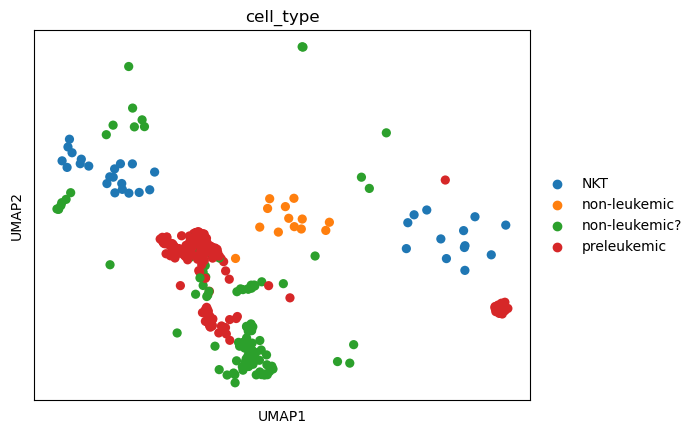

In [32]:
#All cell types
sc.pl.umap(adata_sample, color= "cell_type", color_map= 'viridis')

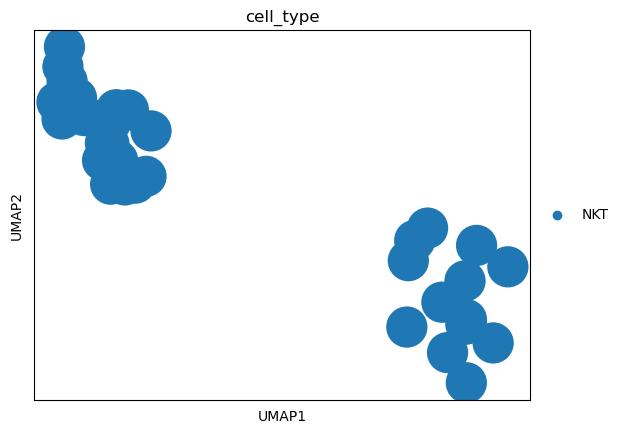

In [33]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = "cell_type", color_map = 'viridis')

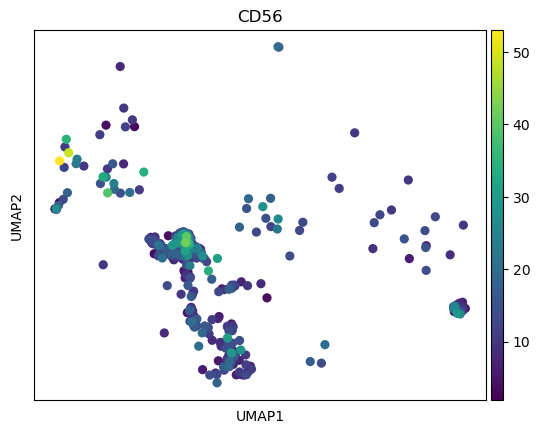

In [34]:
#All cell types

sc.pl.umap(adata_sample, color= markers, color_map= 'viridis')

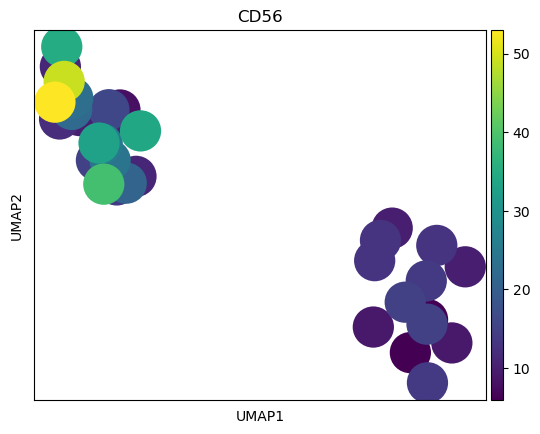

In [35]:
#NK and T-cells

sc.pl.umap(adata_nk, color = markers, color_map = 'viridis')

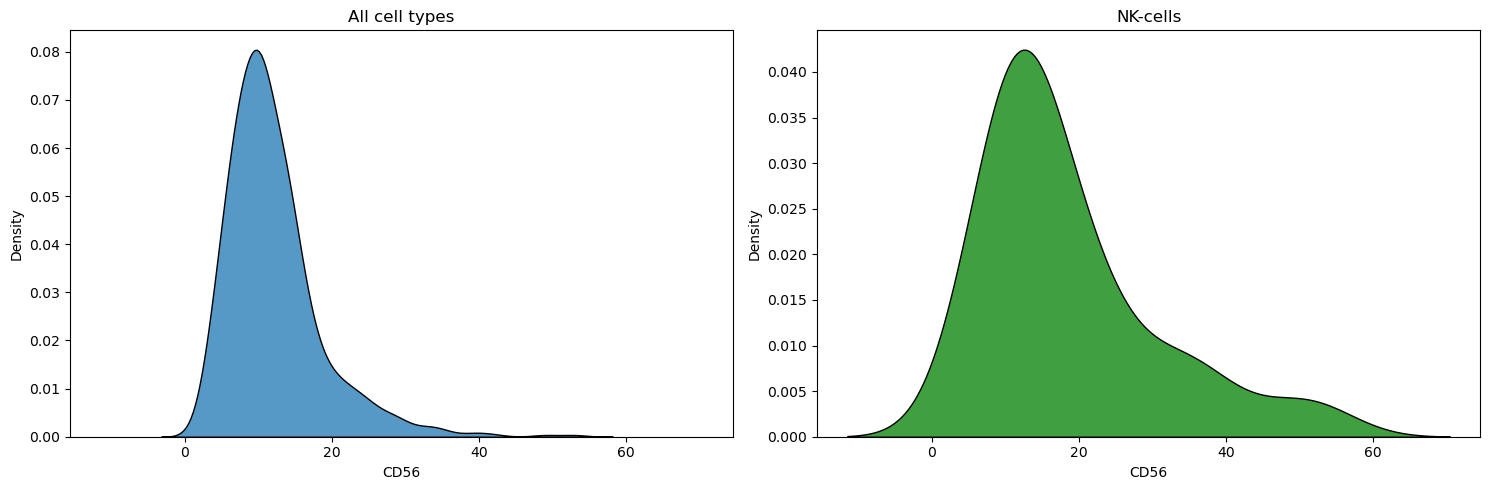

In [92]:
#NK and T-cells

for column_name in markers:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

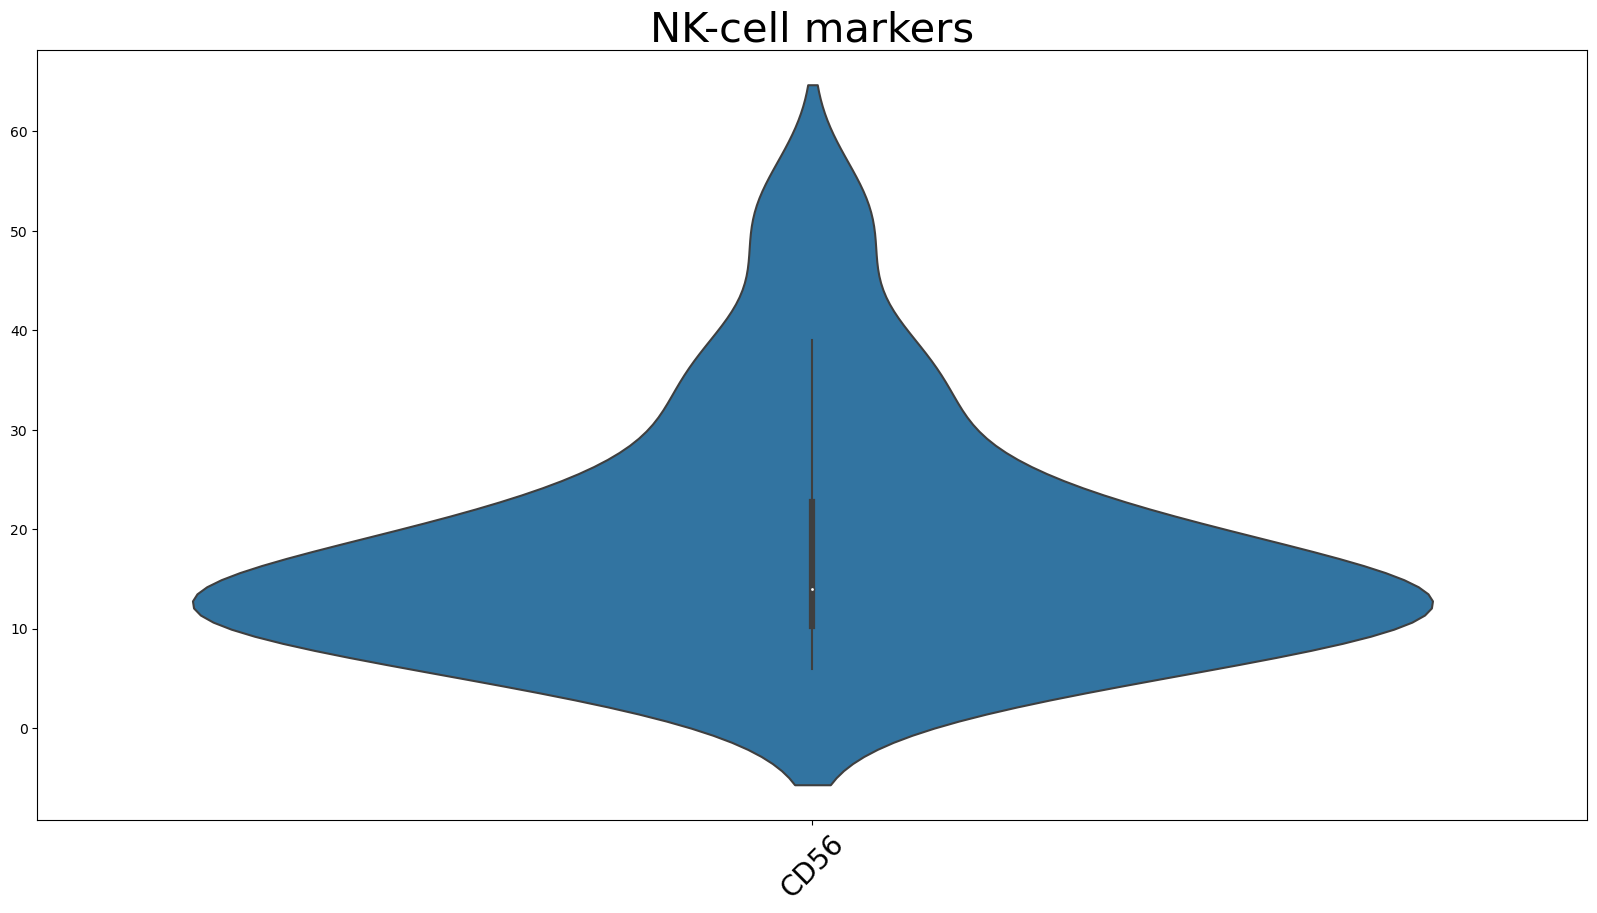

In [37]:
#NK markers

plt.figure(figsize=(20,10))
a=sns.violinplot(data=nk_prot[markers],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK-cell markers", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)